# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.


***Zadanie 2.***

Rozwiąż równanie
$
\dot{x}(t)=\frac{x+t}{x-t}
$,

$x(0)=1$ (równanie to posiada rozwiązanie dokładne:
$x(t)=t+\sqrt{1+2t^2}$).

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.

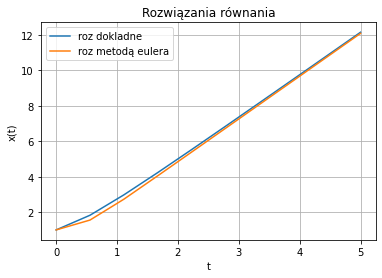

In [20]:
from main import solve_euler
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp



def fun(t,y):
    return (y+t)/(y-t)

y0 = 1
t_span = np.linspace(0, 5, 10)

roz_eu = solve_euler(fun, t_span, y0)
roz_dok = lambda t: t + np.sqrt(1 + 2 * t**2)


plt.plot(t_span, roz_dok(t_span), label = "roz dokladne")
plt.plot(t_span, roz_eu, label = "roz metodą eulera")
plt.title("Rozwiązania równania")
plt.legend()
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

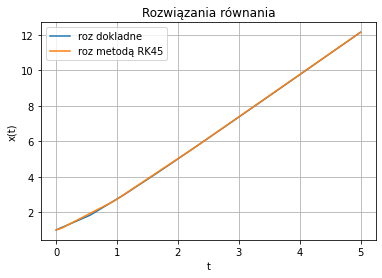

In [21]:
roz45 = solve_ivp(fun, (0, 5), [1], method="RK45")
plt.plot(t_span, roz_dok(t_span), label = "roz dokladne")
plt.plot(roz45.t, roz45.y.T, label = "roz metodą RK45")
plt.title("Rozwiązania równania")
plt.legend()
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()


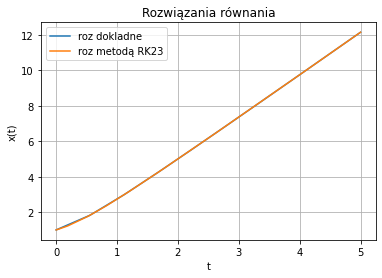

In [22]:
roz23 = solve_ivp(fun, (0, 5), [1], method="RK23")

plt.plot(t_span, roz_dok(t_span), label = "roz dokladne")
plt.plot(roz23.t, roz23.y.T, label = "roz metodą RK23")
plt.title("Rozwiązania równania")
plt.legend()
plt.grid()
plt.ylabel("x(t)")
plt.xlabel("t")
plt.show()

***Zadanie 3.***

Rozwiąż układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$

z warunkiem początkowym $x(0)=[1,0,0,1]^T$.

Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

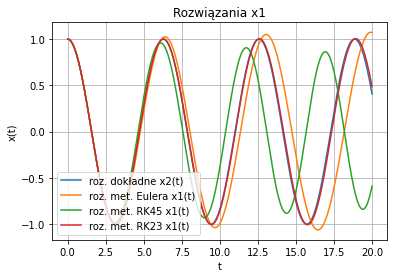

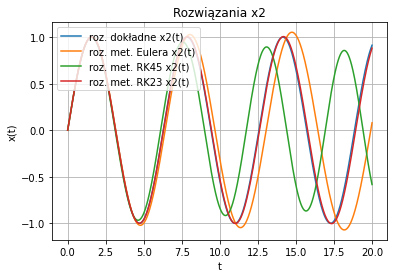

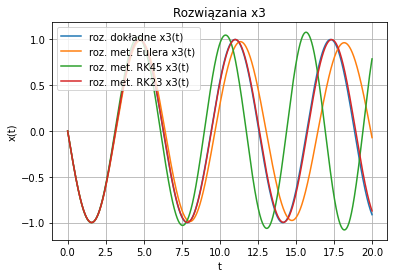

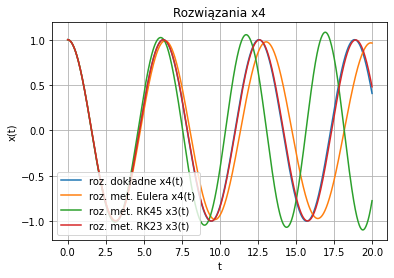

No handles with labels found to put in legend.


Ilość kroków dla metody RK45 bez podania t_evalL: 29
Ilość kroków dla metody RK23 bez podania t_evalL: 82


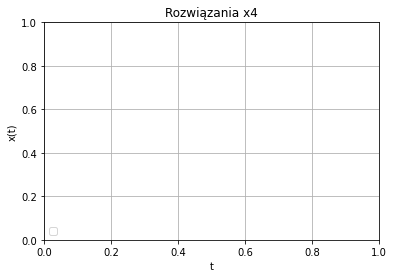

In [23]:
def fun(t, y):
    yr1 = y[2]
    yr2 = y[3]
    yr3 = -y[0] / ((y[0]**2 + y[1]**2)**(3/2))
    yr4 = -y[1] / ((y[0]**2 + y[1]**2)**(3/2))

    return np.array([yr1, yr2, yr3, yr4])

y0 = np.array([1, 0, 0, 1])
t_span = np.linspace(0, 20, 10000)

#roz_dok = lambda t: np.cos(t), lambda t: np.sin(t), lambda t: -np.sin(t), lambda t: np.cos(t)
roz_eu = solve_euler(fun, t_span, y0)
roz45 = solve_ivp(fun, (0,20), y0, vectorized=True, method="RK45", t_eval=t_span)
roz23 = solve_ivp(fun, (0,20), y0, vectorized=True, method="RK23", t_eval=t_span)

plt.plot(t_span, np.cos(t_span), label = "roz. dokładne x2(t)")
plt.plot(t_span, roz_eu[:,0], label = "roz. met. Eulera x1(t)" )
plt.plot(t_span, roz45.y[0], label = "roz. met. RK45 x1(t)" )
plt.plot(t_span, roz23.y[0], label = "roz. met. RK23 x1(t)" )

plt.legend(loc = "lower left")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x1")
plt.grid()
plt.show()

plt.plot(t_span, np.sin(t_span), label = "roz. dokładne x2(t)")
plt.plot(t_span, roz_eu[:,1], label = "roz. met. Eulera x2(t)" )
plt.plot(t_span, roz45.y[1], label = "roz. met. RK45 x2(t)" )
plt.plot(t_span, roz23.y[1], label = "roz. met. RK23 x2(t)" )

plt.legend(loc = "upper left")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x2")
plt.grid()
plt.show()

plt.plot(t_span, -np.sin(t_span), label = "roz. dokładne x3(t)")
plt.plot(t_span, roz_eu[:,2], label = "roz. met. Eulera x3(t)" )
plt.plot(t_span, roz45.y[2], label = "roz. met. RK45 x3(t)" )
plt.plot(t_span, roz23.y[2], label = "roz. met. RK23 x3(t)" )

plt.legend(loc = "upper left")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x3")
plt.grid()
plt.show()

plt.plot(t_span, np.cos(t_span), label = "roz. dokładne x4(t)")
plt.plot(t_span, roz_eu[:,3], label = "roz. met. Eulera x4(t)" )
plt.plot(t_span, roz45.y[3], label = "roz. met. RK45 x3(t)" )
plt.plot(t_span, roz23.y[3], label = "roz. met. RK23 x3(t)" )

plt.legend(loc = "lower left")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x4")
plt.grid()
plt.show()


roz45d = solve_ivp(fun, (0,20), y0, vectorized=True, method="RK45")
roz23d = solve_ivp(fun, (0,20), y0, vectorized=True, method="RK23")

print("Ilość kroków dla metody RK45 bez podania t_evalL: {}".format(np.size(roz45d.t)))
print("Ilość kroków dla metody RK23 bez podania t_evalL: {}".format(np.size(roz23d.t)))

plt.legend(loc = "lower left")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Rozwiązania x4")
plt.grid()
plt.show()


Metoda Rungego-Kutty 23 okazała się być bardzo skuteczna dla tego przykładu, nawet pod koniec przedziału wykres praktycznie
pokrywa się z wykresem rozwiązania dokładnego. Co ciekawe metoda RK45 nie poradziła sobie z zadanym
przykładem zbyt dobrze. Wykres szybko rozbiega się z rozwiązaniem dokładnym dla każdego x. Błędy
nie następują jedynie w 'przesunięciu' wykresu, ale też RK45 wraz z czasem zmiejsza amplitudę. Pod
koniec przedziału wykresy RK45 i dokładnego rozwiązania nie mają już ze sobą wiele wspólnego. RK45
w tym przypadu daje nam gorszy wynik niż metoda Eulera.
Trzeba też zanotować, że wymusiliśmy zastosowanie 10000 kroków dla metod R23 oraz R45, bez zdefiniowania
parametru t_eval RK45 zachowuje się jeszcze gorzej. Wykres nie tylko się nie pokrywa, ale też jest
bardzo kańciasty. Metoda RK23 także i bez podania parametru t_eval nie rozbiega się z rozwiązaniem dokładnym.

Wymuszając parametr t_eval nie korzystamy ze "zmiennokrokowości" metod RK, ale w tym przypadku nie
zmniejszy nam do dokładności (wymuszone dużo więcej kroków, przez co zwiększy się nam ilość obliczeń
potrzebnych do rozwiązania problemu)

***Zadanie 4.***

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz
$
\mathbf{A}$ dana jest wzorem:
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

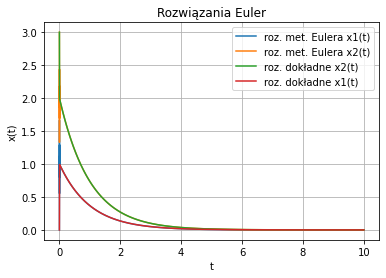

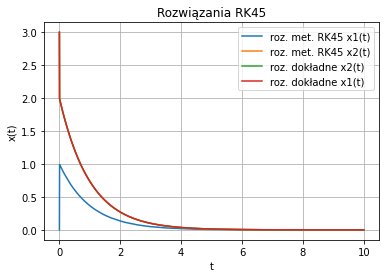

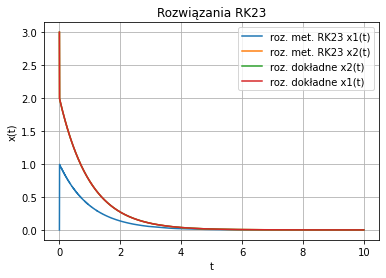

In [24]:
 def fun(t, y):
    A = np.array([[-667, 333], [666, -334]])
    return A @ y

y0 = np.array([0,3])

t_span = np.linspace(0, 10, 6000)
roz_eu = solve_euler(fun, t_span, y0)
roz45 = solve_ivp(fun, (0,10), y0, vectorized=True, method="RK45", t_eval=t_span)
roz23 = solve_ivp(fun, (0,10), y0, vectorized=True, method="RK23", t_eval=t_span)

roz_dok1 = lambda t : np.e ** (-t) - np.e ** (-1000 * t)
roz_dok2 = lambda t : 2 * np.e ** (-t) + np.e ** (-1000 * t)


plt.plot(t_span, roz_eu[:,0], label = "roz. met. Eulera x1(t)" )
plt.plot(t_span, roz_eu[:,1], label = "roz. met. Eulera x2(t)" )
plt.plot(t_span, roz_dok2(t_span), label = "roz. dokładne x2(t)")
plt.plot(t_span, roz_dok1(t_span), label = "roz. dokładne x1(t)")

plt.legend()
plt.title("Rozwiązania Euler")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()


plt.plot(t_span, roz45.y[0], label = "roz. met. RK45 x1(t)" )
plt.plot(t_span, roz45.y[1], label = "roz. met. RK45 x2(t)" )
plt.plot(t_span, roz_dok2(t_span), label = "roz. dokładne x2(t)")
plt.plot(t_span, roz_dok2(t_span), label = "roz. dokładne x1(t)")


plt.legend()
plt.title("Rozwiązania RK45")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()


plt.plot(t_span, roz23.y[0], label = "roz. met. RK23 x1(t)" )
plt.plot(t_span, roz23.y[1], label = "roz. met. RK23 x2(t)" )
plt.plot(t_span, roz_dok2(t_span), label = "roz. dokładne x2(t)")
plt.plot(t_span, roz_dok2(t_span), label = "roz. dokładne x1(t)")

plt.legend()
plt.title("Rozwiązania RK23")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

Dla zadanego t_eval metody RK23 i RK45 bardzo dobrze pokrywają się z rozwiązaniem dokładnym. Metoda Eulera ma za to problem na
początku wykresu - dla nagłej zmiany z pionowej kreski na krzywą. Metoda Eulera "chce" dalej kontynuować prostą.

rozwiązaniem dokładnym tego układu jest:

x=c1 * e^(-t) * \begin{pmatrix}1\\ 2\end{pmatrix} + c2 * e^(-1000t) *
\begin{pmatrix}-1\\ 1\end{pmatrix}

Wynik ten można otrzymać stosując odpowiednie wzór na rozwiązanie układu: x(t)=e^(A(t−t0))x0
Macierz e^(A(t−t0)) otrzymujemy zaś korzystając z dekompozycji Jordana (czyli ponownie, zastosowując
odpowiednie wzory)

c1 oraz c2 to stałe, za które do rysowania wykresów przyjęłam 1

***Zadanie 4.***

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

In [25]:
def fun(t, x):

    u = 0.012277471
    u2 = 1 - u

    D1 = ((x[0] + u)**2 + x[2]**2)**(3/2)
    D2 = ((x[0] - u2)**2 + x[2]**2)**(3/2)


    x1 = x[1]
    x2 = x[0] + 2 * x[3] - u2 * (x[0] + u) / D1 - u * (x[0] - u2) / D2
    x3 = x[3]
    x4 = x[2] - 2 * x[1] - u2 * x[2] / D1 -  u * x[2] / D2

    return np.array([x1, x2, x3, x4])

y0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
T = 17.0652165601579625588917206249

t_span = np.linspace(0, T, 507065 )

result = solve_euler(fun, t_span, y0)
result23 = solve_ivp(fun, (0, T), y0, vectorized=True, method="RK23", t_eval=t_span)
result45 = solve_ivp(fun, (0, T), y0, vectorized=True, method="RK45", t_eval=t_span)

metoda RK45

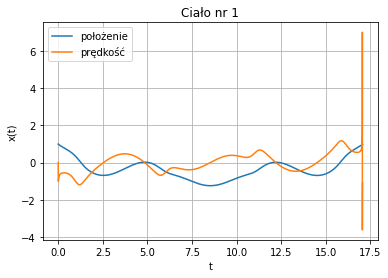

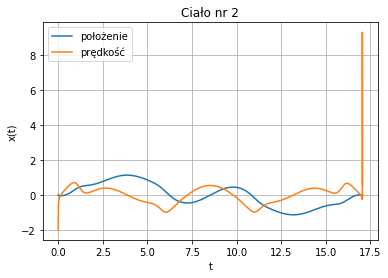

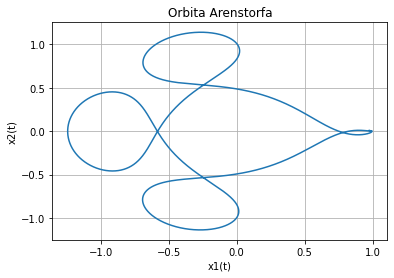

In [26]:
plt.plot(t_span, result45.y[0], label = "położenie")
plt.plot(t_span, result45.y[1], label = "prędkość")
plt.legend()
plt.title("Ciało nr 1")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

plt.plot(t_span, result45.y[2], label = "położenie")
plt.plot(t_span, result45.y[3], label = "prędkość")
plt.legend()
plt.title("Ciało nr 2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()



plt.plot(result45.y[0], result45.y[2])
plt.title("Orbita Arenstorfa")
plt.xlabel("x1(t)")
plt.ylabel("x2(t)")
plt.grid()
plt.show()

metoda RK23

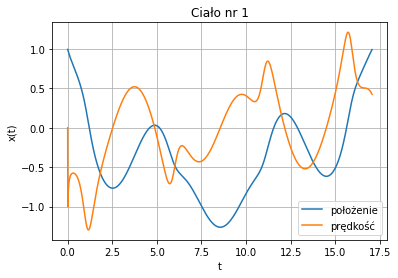

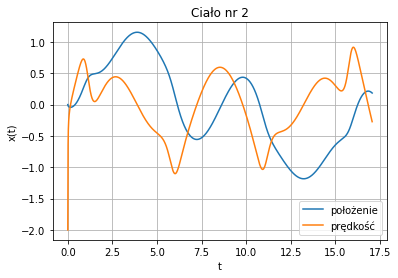

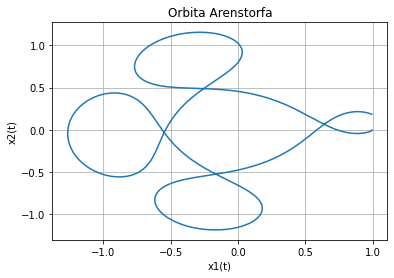

In [27]:
plt.plot(t_span, result[:,0], label = "położenie")
plt.plot(t_span, result[:,1], label = "prędkość")
plt.legend()
plt.title("Ciało nr 1")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

plt.plot(t_span, result[:,2], label = "położenie")
plt.plot(t_span, result[:,3], label = "prędkość")
plt.legend()
plt.title("Ciało nr 2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()



plt.plot(result[:,0], result[:,2])
plt.title("Orbita Arenstorfa")
plt.xlabel("x1(t)")
plt.ylabel("x2(t)")
plt.grid()
plt.show()

metoda Eulera - zwiększony krok w porównaniu do poprzednich laboratoriów

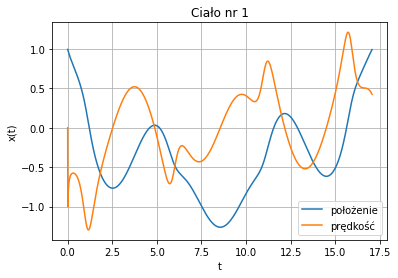

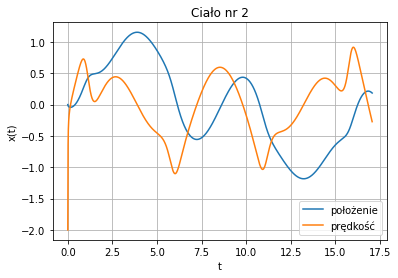

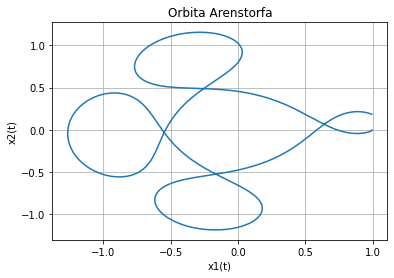

In [28]:
plt.plot(t_span, result[:,0], label = "położenie")
plt.plot(t_span, result[:,1], label = "prędkość")
plt.legend()
plt.title("Ciało nr 1")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

plt.plot(t_span, result[:,2], label = "położenie")
plt.plot(t_span, result[:,3], label = "prędkość")
plt.legend()
plt.title("Ciało nr 2")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()



plt.plot(result[:,0], result[:,2])
plt.title("Orbita Arenstorfa")
plt.xlabel("x1(t)")
plt.ylabel("x2(t)")
plt.grid()
plt.show()

Tym razem to metoda RK45 daje nam najdokładniejszy wynik, chociaż znów można zauważyć
lekkie "zwężenie" wykresu przez tą metodę, tak jak to było bardzo widoczne w zadaniu
nr3. Dla zadanych parametrów metody Eulera i RK23 zachowują się podobnie do siebie -
wykresy nie są idealne, ale jednak przybliżają kształt, który powinny. W przeciwnieństwie
do RK45 można zaobserwować "rozszerzenie" (które jest dużo większe co do wartości od
"zwężenia" metody RK45)

Dla każdej metody, w przynajmniej jednym wykresie prędkości ciał, dla zadanych parametrów
pojawiają się "ogony", które psują okresowość.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
